In [86]:
## Load the required packages

import sys
import subprocess

# implement pip as a subprocess:
subprocess.check_call([sys.executable, '-m', 'pip', 'install','seaborn'])


import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# python or jupyter notebook usually only play the last call, so we need the above code to make every call can be seen
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


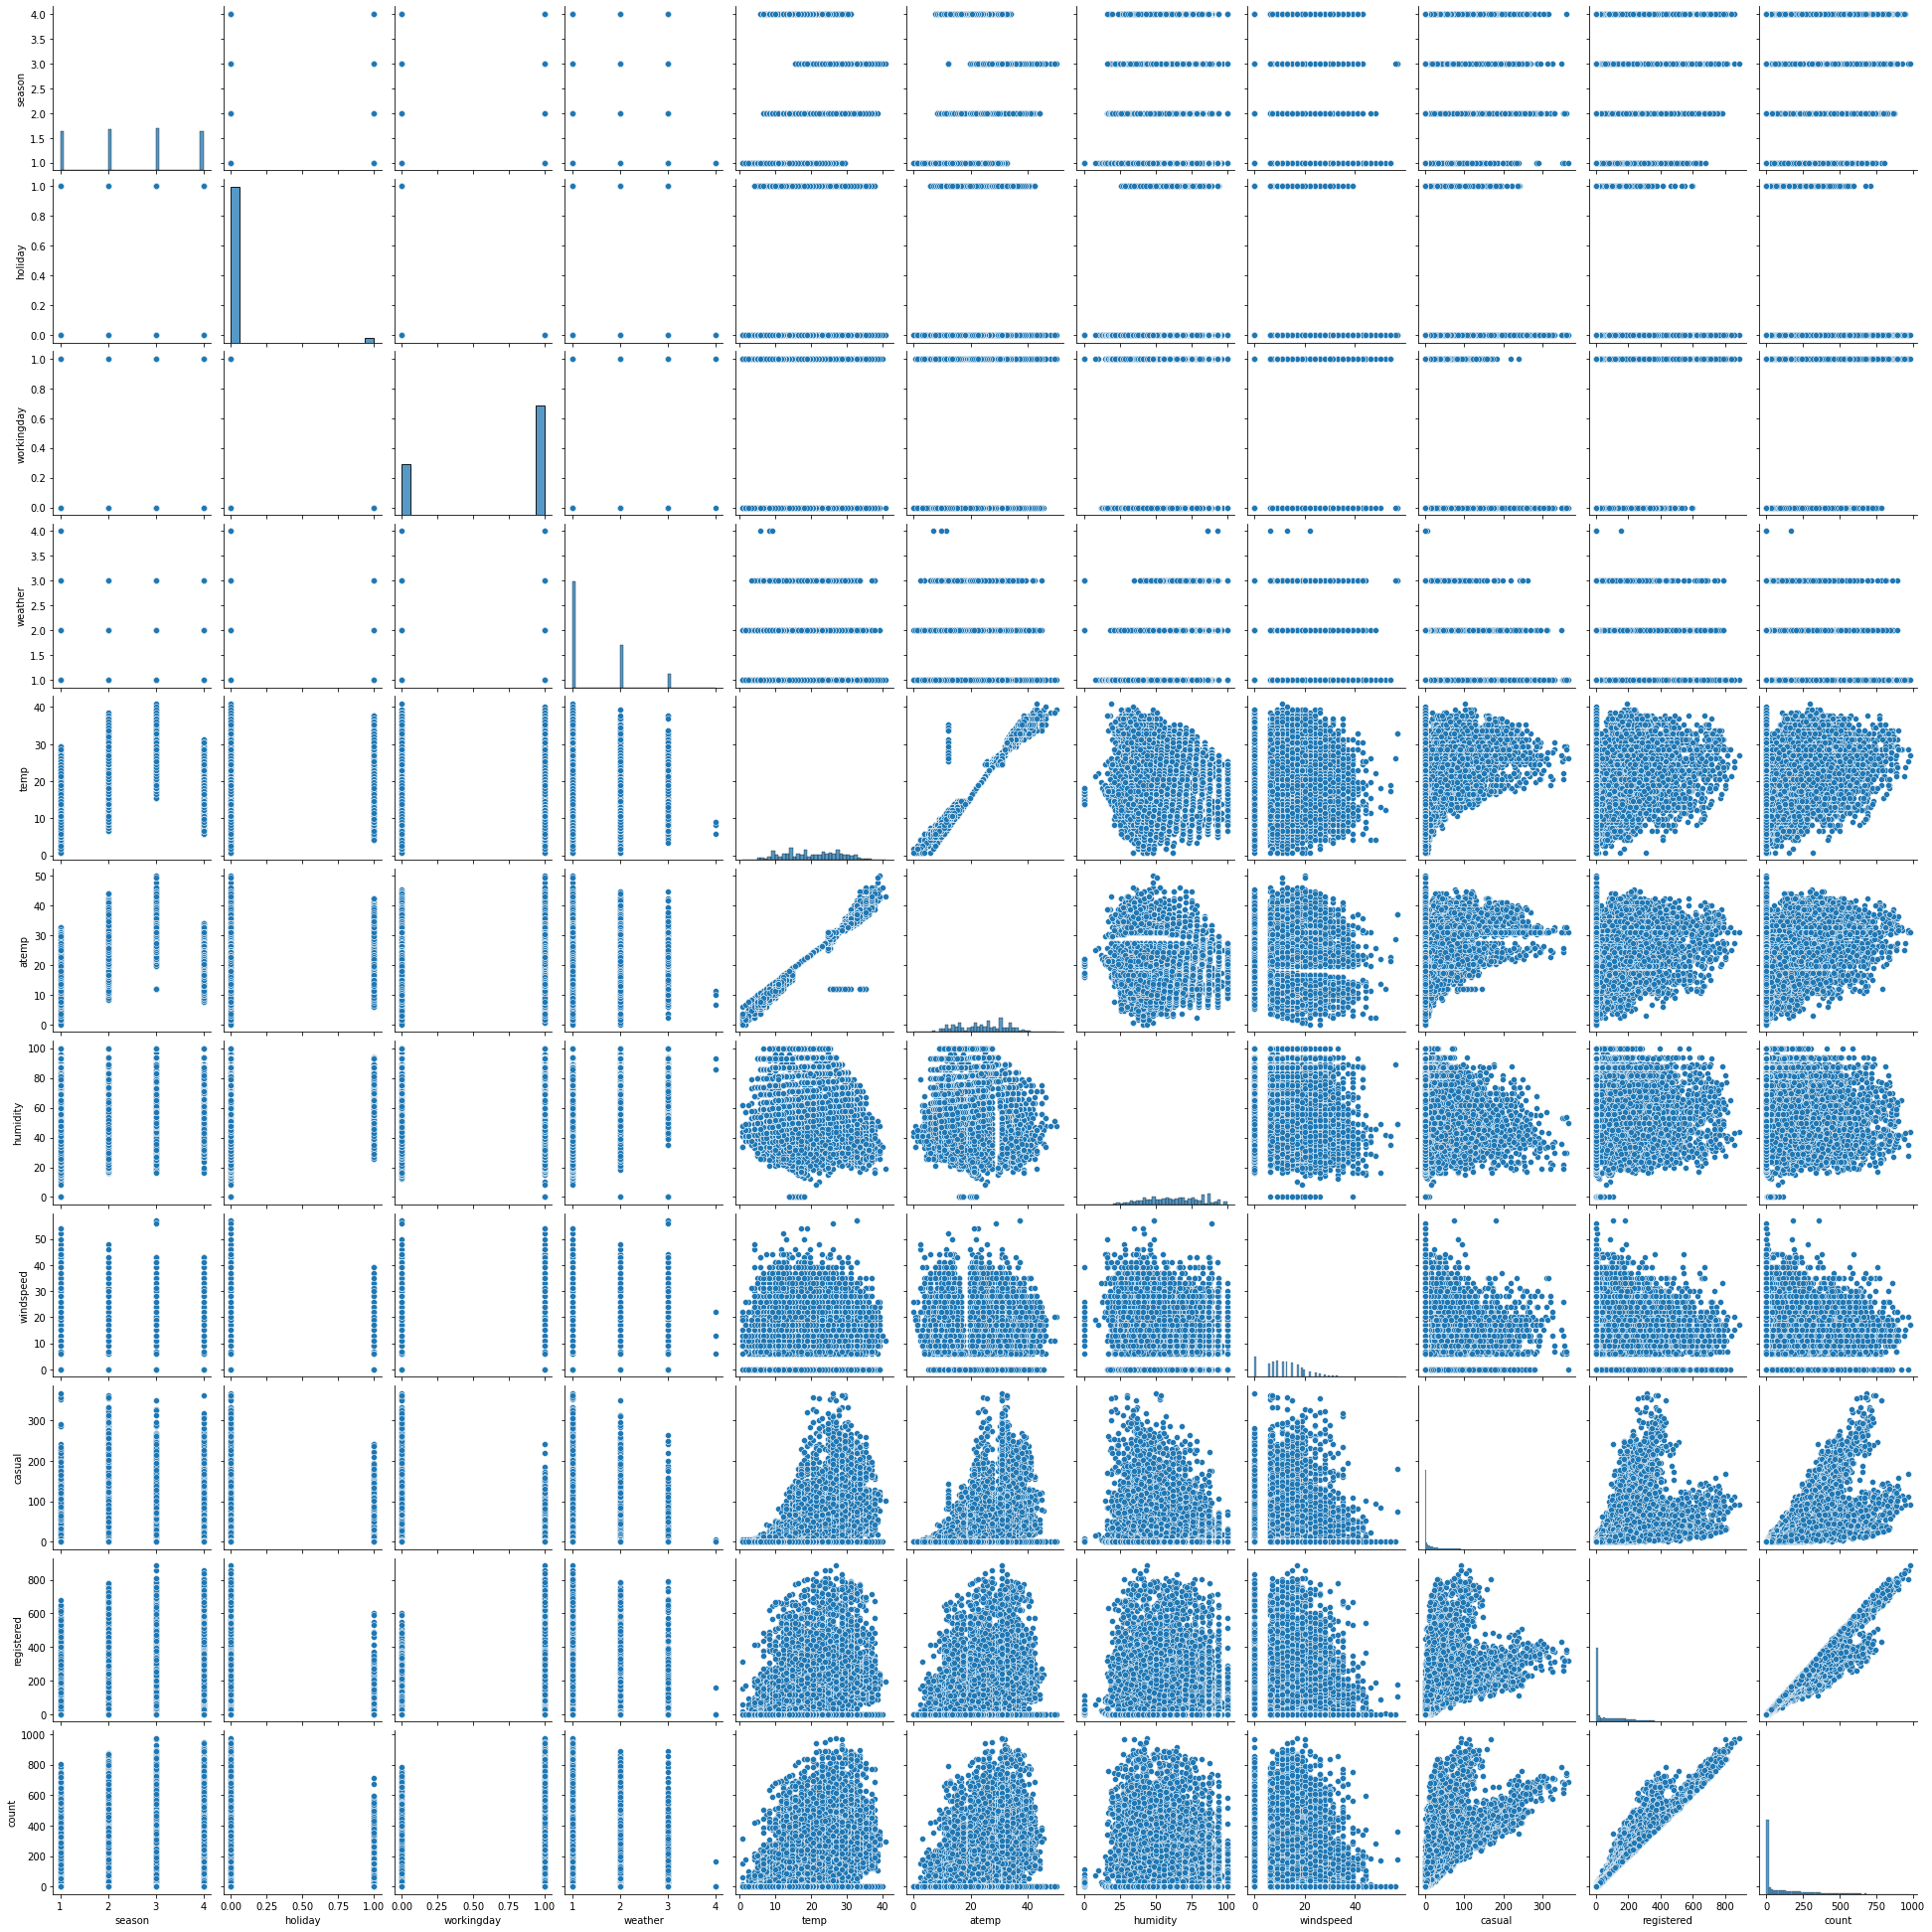

In [87]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.info()
test.info()

train.describe()
test.describe()

test["casual"]=0
test["registered"]=0
test["count"]=0
test["traintest"]='test'
train["traintest"]='train'

all_data=pd.concat((train,test))

#without regression
sns.pairplot(all_data, kind="scatter")
plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     17379 non-null  object 
 1   season       17379 non-null  int64  
 2   holiday      17379 non-null  int64  
 3   workingday   17379 non-null  int64  
 4   weather      17379 non-null  int64  
 5   temp         17379 non-null  float64
 6   atemp        17379 non-null  float64
 7   humidity     17379 non-null  int64  
 8   windspeed    17379 non-null  float64
 9   casual       17379 non-null  int64  
 10  registered   17379 non-null  int64  
 11  count        17379 non-null  int64  
 12  traintest    17379 non-null  object 
 13  year         17379 non-null  int64  
 14  month        17379 non-null  int64  
 15  day          17379 non-null  int64  
 16  hour_of_day  17379 non-null  int64  
 17  day_of_week  17379 non-null  int64  
 18  weekday      17379 non-null  float64
dtypes: fl

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

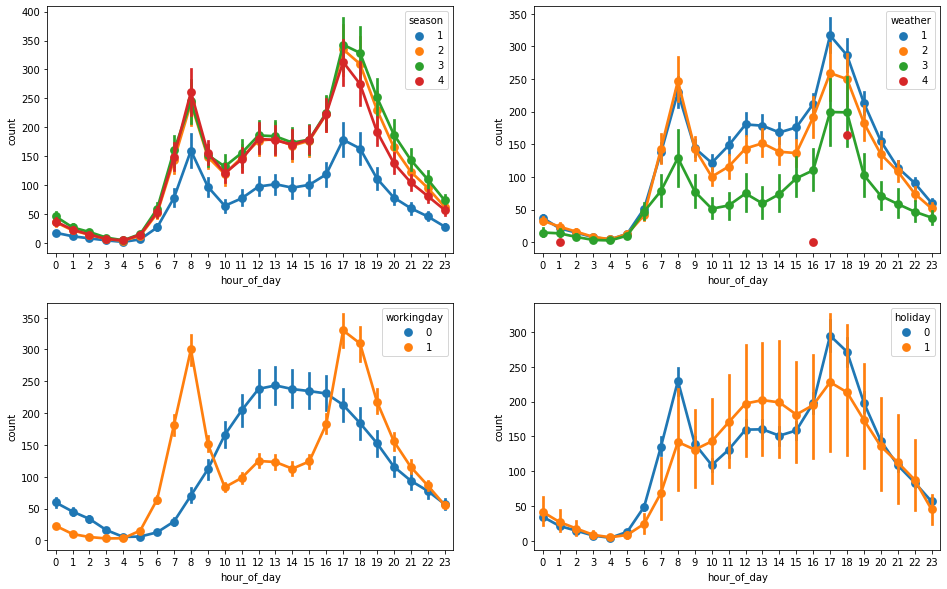

In [89]:
## Decomposing datetime variable to year, month, hour and day of the week in all_data

all_data['year'] = pd.DatetimeIndex(all_data['datetime']).year
all_data['month'] = pd.DatetimeIndex(all_data['datetime']).month
all_data['day'] = pd.DatetimeIndex(all_data['datetime']).day
all_data['hour_of_day'] = pd.DatetimeIndex(all_data['datetime']).hour 
all_data['day_of_week'] = pd.DatetimeIndex(all_data['datetime']).dayofweek 
all_data['weekday'] = ((pd.DatetimeIndex(all_data['datetime']).dayofweek) // 5 == 1).astype(float)

all_data.info()

fig, axes = plt.subplots(2,2,figsize = (16, 10))
ax11 = plt.subplot(2,2,1)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['season'] , 
              ax = ax11, title = 'The influence of hour of day of season')

ax12 = plt.subplot(2,2,2)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['weather'] ,
              ax = ax12,title = 'The influence of hour of day of weather')

ax2 = plt.subplot(2,2,3)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['workingday'] , 
              ax = ax2, title = 'The influence of hour of day of working day')

ax3 = plt.subplot(2,2,4)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['holiday'] , 
              ax = ax3,title = 'The influence of hour of day of holiday')


## Through the plots, we find that during winter and spring, the usage of bicyles is smaller than other seasons.
## Whether it is a holiday or workday does not have a great influence on the usage of bicycle.

,temp,count
temp,1.000000,0.245778
count,0.245778,1.000000


<AxesSubplot:xlabel='temp', ylabel='count'>

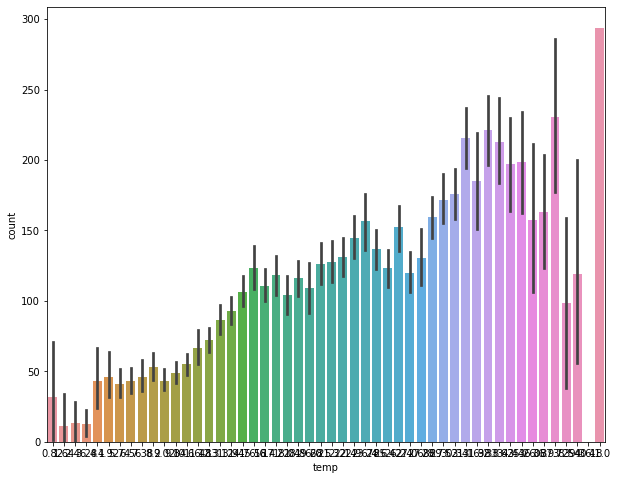

In [90]:
## The relationship between temperature and count
fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data[['temp','count']].corr()
sns.barplot(x=all_data['temp'] ,y=all_data['count'])

## The correlation is not very strong, but it is still positive.
## According to the plot, we find that there is a blank column. 

,humidity,count
humidity,1.000000,-0.240892
count,-0.240892,1.000000


<AxesSubplot:xlabel='humidity', ylabel='count'>

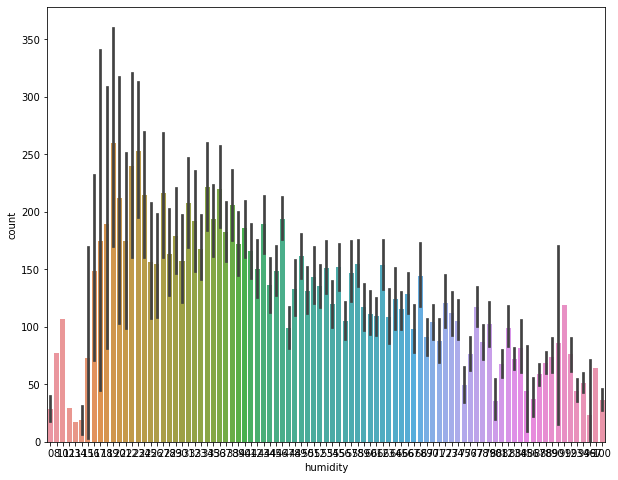

In [91]:
## The relationship between humidity and count
fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data[['humidity','count']].corr()
sns.barplot(x=all_data['humidity'] ,y=all_data['count'])

## The correlation is negative.

,windspeed,count
windspeed,1.0000,0.0725
count,0.0725,1.0000


<AxesSubplot:xlabel='windspeed', ylabel='count'>

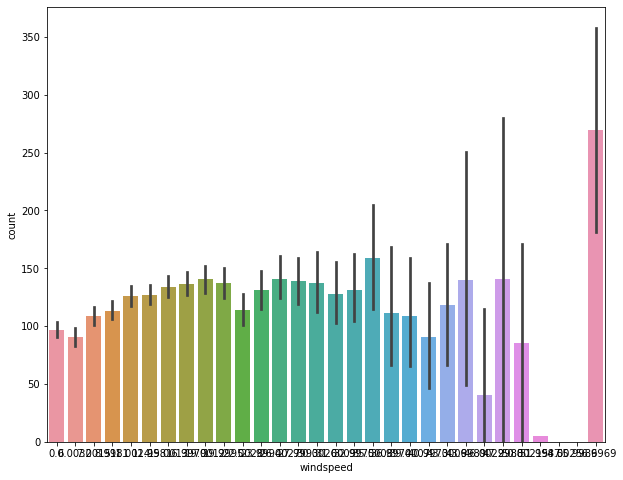

In [92]:
## The relationship between wind speed and count

fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data[['windspeed','count']].corr()
sns.barplot(x=all_data['windspeed'] ,y=all_data['count'])

## The wind speed is relatively not so related to the result.

<AxesSubplot:xlabel='hour_of_day'>

<AxesSubplot:xlabel='hour_of_day'>

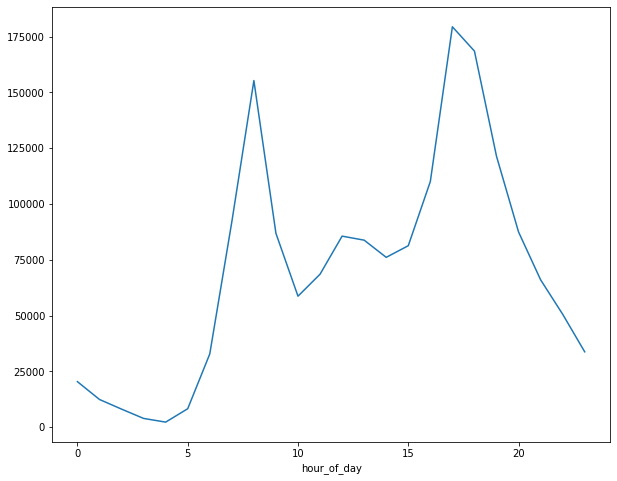

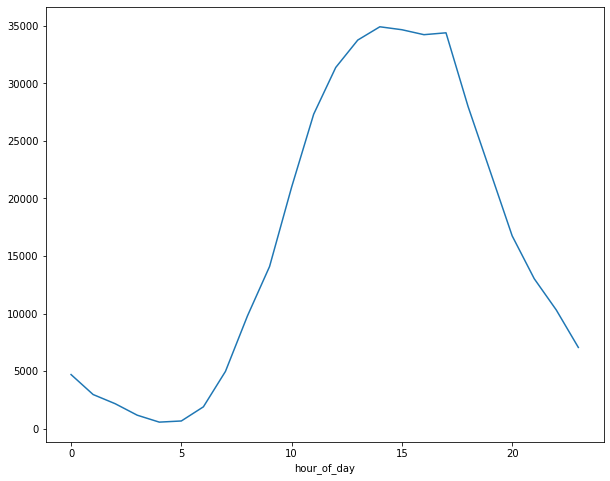

In [93]:
# registered users
fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data.groupby('hour_of_day').sum()['registered'].sort_index().plot(kind='line')

# casual users
fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data.groupby('hour_of_day').sum()['casual'].sort_index().plot(kind='line')

# There is a small difference in demand between registered users and casual users during different hours.

<AxesSubplot:ylabel='Density'>

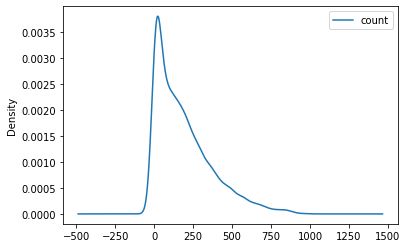

In [95]:
## Distribution
all_data.loc[all_data.traintest=='train',["count"]].plot(kind='kde')

## log transformation (how to transform
### import math
### all_data.loc[all_data.traintest=='train',["count"]]['count'].apply(lambda x:math.log(1+x)).plot(kind='kde')

## Both the original and the transformed data are not completely normal distributtion.

<AxesSubplot:ylabel='count'>

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Boxplot of Count')]

<AxesSubplot:xlabel='season', ylabel='count'>

[Text(0.5, 0, 'Season'), Text(0.5, 1.0, 'Boxplot of Season Vs Count')]

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

[Text(0.5, 0, 'Hour of day'),
 Text(0.5, 1.0, 'Boxplot of Hour of day Vs Count')]

<AxesSubplot:xlabel='workingday', ylabel='count'>

[Text(0.5, 0, 'Workingday'), Text(0.5, 1.0, 'Boxplot of Wokingday Vs Count')]

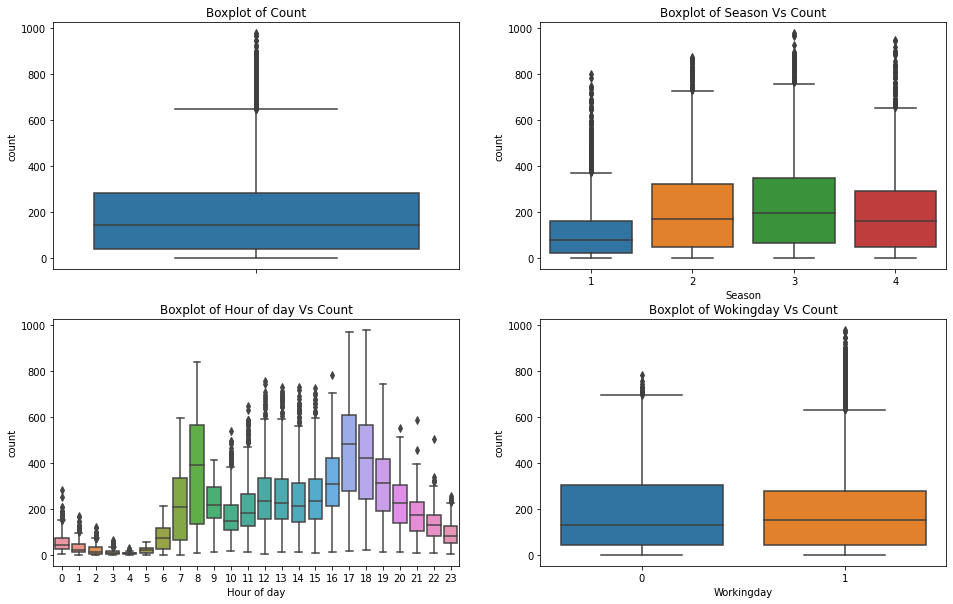

In [96]:
## Detect outlier
# Draw boxplots
fig, axes = plt.subplots(2,2,figsize = (16, 10))
ax1 = plt.subplot(2,2,1)
sns.boxplot(y="count" ,data=all_data.loc[all_data.traintest=='train'],
              ax = ax1)
ax1.set(ylabel='count',title = 'Boxplot of Count')

ax2 = plt.subplot(2,2,2)
sns.boxplot(x="season", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax2)
ax2.set(xlabel='Season',title = 'Boxplot of Season Vs Count')

ax3 = plt.subplot(2,2,3)
sns.boxplot(x="hour_of_day", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax3)
ax3.set(xlabel='Hour of day',title = 'Boxplot of Hour of day Vs Count')

ax4 = plt.subplot(2,2,4)
sns.boxplot(x="workingday", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax4)
ax4.set(xlabel='Workingday',title = 'Boxplot of Wokingday Vs Count')

# According to the boxplots, there may be some outliers.

### TROUBLE IN OUTLIERS
##outlier = all_data[np.abs(all_data["count"]-all_data["count"].mean())<=(3*all_data["count"].std())] 

##len(all_data.loc[all_data.traintest=='train'][outlier['count'].values])    

##len(all_data.loc[all_data.traintest=='train'][goodpoints['count'].values])
##all_data=pd.concat((all_data.loc[all_data.traintest=='train'][goodpoints['count'].values],all_data.loc[all_data.traintest=='test']))


In [98]:
## Decomposing datetime variable to year, month, hour and day of the week in train_data
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour_of_day'] = pd.DatetimeIndex(train['datetime']).hour 
train['day_of_week'] = pd.DatetimeIndex(train['datetime']).dayofweek 
train['weekday'] = ((pd.DatetimeIndex(train['datetime']).dayofweek) // 5 == 1).astype(float)

test['year'] = pd.DatetimeIndex(test['datetime']).year
test['month'] = pd.DatetimeIndex(test['datetime']).month
test['day'] = pd.DatetimeIndex(test['datetime']).day
test['hour_of_day'] = pd.DatetimeIndex(test['datetime']).hour 
test['day_of_week'] = pd.DatetimeIndex(test['datetime']).dayofweek 
test['weekday'] = ((pd.DatetimeIndex(test['datetime']).dayofweek) // 5 == 1).astype(float)


scaler = StandardScaler()
temp_scale_param = scaler.fit(all_data[['temp']])
all_data['temp_scaled'] = scaler.fit_transform(all_data[['temp']], temp_scale_param)

scaler = StandardScaler()
atemp_scale_param = scaler.fit(all_data[['atemp']])
all_data['atemp_scaled'] = scaler.fit_transform(all_data[['atemp']], atemp_scale_param)

train = train.drop(['datetime'], axis=1) 
test = test.drop(['datetime'], axis=1) 

In [70]:
## Linear Regression Model
dataTrain = train.drop(['day','casual', 'registered', 'count'], axis=1)  
dataTest = test.drop(['day'], axis=1)  
yLabel = train["count"]  
yLableRegistered = train["registered"]  
yLableCasual = train["casual"]  

model = LinearRegression()  
yLabelsLog = np.log1p(yLabel)  
model.fit(X=train_x, y=yLabelsLog)  
  
LR_preds = model.predict(dataTest)  
  
np.exp(LR_preds).mean() 


## Linear Regression Model
lr = LinearRegression()
lr.fit(train_x, train_y)
pred_train = lr.predict(train_x)
RMSE_train = mean_squared_error(train_y, pred_train)**0.5
RMSE_train 
print('RMSE on training set: %0.3g' %RMSE_train)

ValueError: could not convert string to float: 'train'

In [67]:
RF = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 12)
RF.fit(train_x, train_y)
pred_train = RF.predict(train_x)
RMSE_train = mean_squared_error(train_y, pred_train)**0.5

print('RMSE on training set: %0.3g' %RMSE_train)

x_train, x_test, y_train, y_test = train_test_split(dataTrain, y, test_size = 0.33, random_state = 42)  
rf = RandomForestRegressor()  
rf.fit(x_train, y_train)  
prediction = rf.predict(X_test)  
mean_squared_error(y_test, prediction)     
rf.fit(X, new_y)  
bikes_test= bikes_test.drop(['datetime'],axis=1)  
prediction = rf.predict(bikes_test)  
prediction = np.exp(prediction) - 1


ValueError: could not convert string to float: 'train'